# Forward Stagewise GLM Debugging Notebook

Test out basic least squares regression with ForwardStagewiseGLM class implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.base import clone as clone_model

from genestboost import ForwardStagewiseGLM
from genestboost.weak_learners import SimpleOLS
from genestboost.link_functions import IdentityLink
from genestboost.loss_functions import AbsoluteLoss, LeastSquaresLoss, LogCoshLoss, QuantileLoss

%matplotlib inline

### Create Fake Dataset for Regression

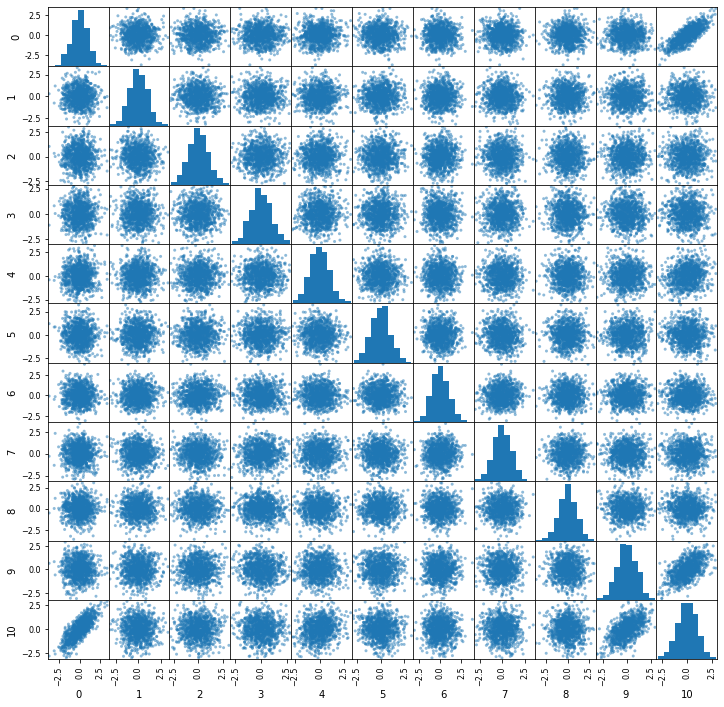

In [2]:
X, y = make_regression(n_samples=1000,
                       n_features=10,
                       n_informative=3,
                       noise=6.0,
                       random_state=0)
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pd.plotting.scatter_matrix(pd.DataFrame(np.hstack([X, y.reshape(-1, 1)])), figsize=(12, 12));

### Test 1: Identity Link with Least Squares Loss 

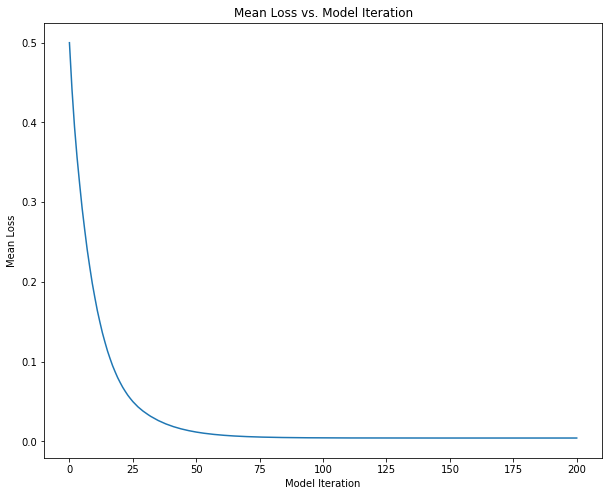

In [3]:
model = ForwardStagewiseGLM(link=IdentityLink(),
                            loss=LeastSquaresLoss(),
                            alpha=0.1)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

,0,1,2,3,4,5,6,7,8,9
199,0.788498,0.001399,0.0,0.0,0.145689,0.00085,0.0,0.0,0.0,0.594171


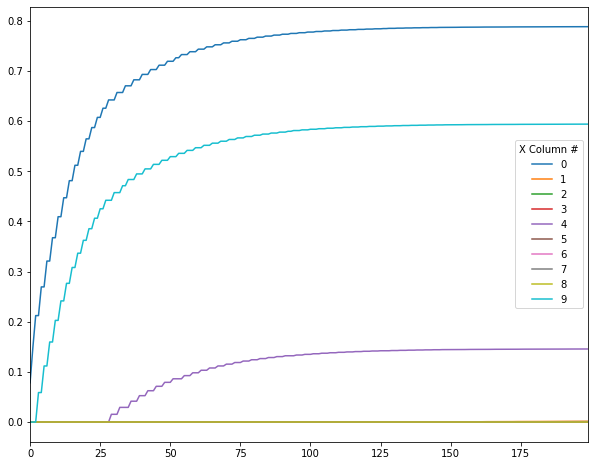

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history())
coef_history.plot(ax=ax)
ax.legend(title="X Column #")
coef_history.tail(1)

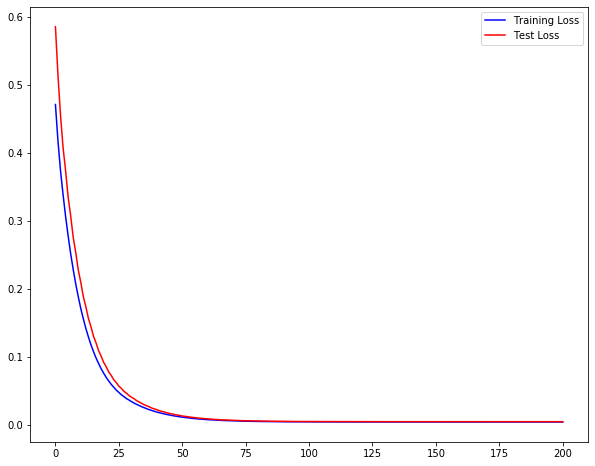

In [5]:
preds_train = model.prediction_history(X_train)
loss_train = model.loss_history(X_train, y_train)
preds_test = model.prediction_history(X_test)
loss_test = model.loss_history(X_test, y_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(loss_train, color="blue", label="Training Loss")
ax.plot(loss_test, color="red", label="Test Loss")
ax.legend();

In [6]:
model.get_coefficient_order()

[0, 9, 4, 1, 5]

### Test 2: Same as Test 1 but with AbsoluteLoss

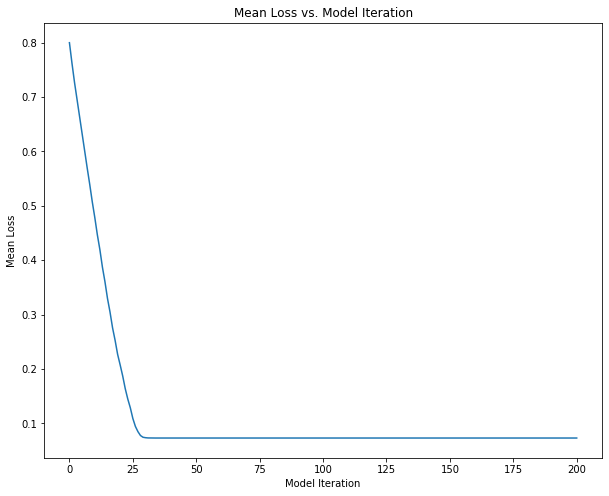

In [7]:
model = ForwardStagewiseGLM(link=IdentityLink(),
                            loss=AbsoluteLoss(),
                            alpha=0.1)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

,0,1,2,3,4,5,6,7,8,9
199,0.788507,0.001012,0.0,0.002945,0.147928,-0.000055,0.0,0.000578,0.0,0.594711


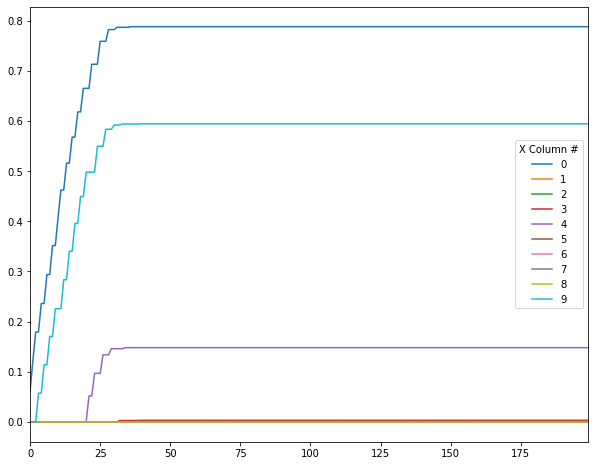

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history())
coef_history.plot(ax=ax)
ax.legend(title="X Column #")
coef_history.tail(1)

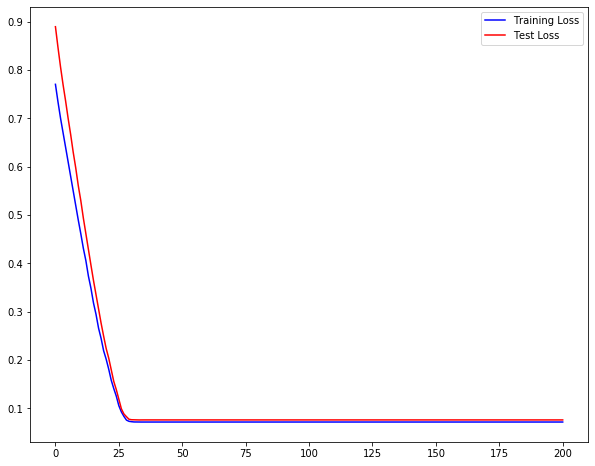

In [9]:
preds_train = model.prediction_history(X_train)
loss_train = model.loss_history(X_train, y_train)
preds_test = model.prediction_history(X_test)
loss_test = model.loss_history(X_test, y_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(loss_train, color="blue", label="Training Loss")
ax.plot(loss_test, color="red", label="Test Loss")
ax.legend();

In [10]:
model.get_coefficient_order()

[0, 9, 4, 3, 1, 5, 7]

### Test 3: Same as Test 3 but with LogCoshLoss and Newton Weights

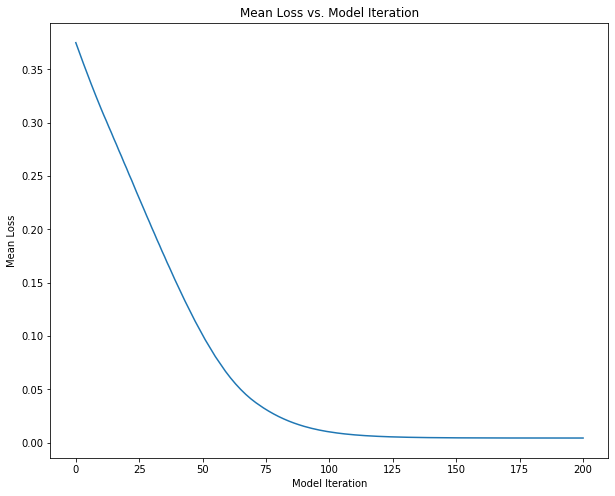

In [11]:
model = ForwardStagewiseGLM(link=IdentityLink(),
                            loss=LogCoshLoss(),
                            alpha=0.1,
                            weights="newton")
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

,0,1,2,3,4,5,6,7,8,9
199,0.787061,0.0,0.0,0.0,0.144527,0.0,0.0,0.0,0.0,0.592678


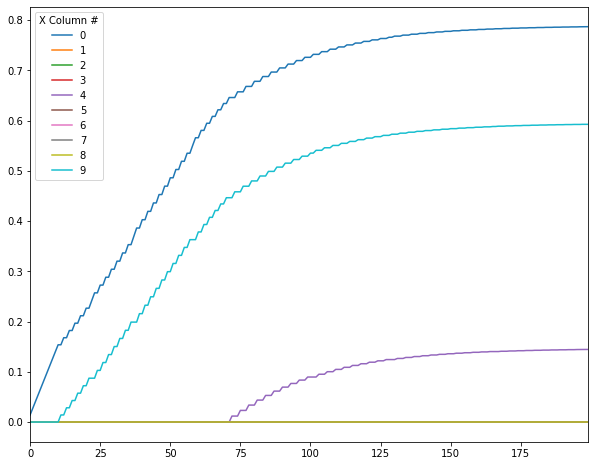

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history())
coef_history.plot(ax=ax)
ax.legend(title="X Column #")
coef_history.tail(1)

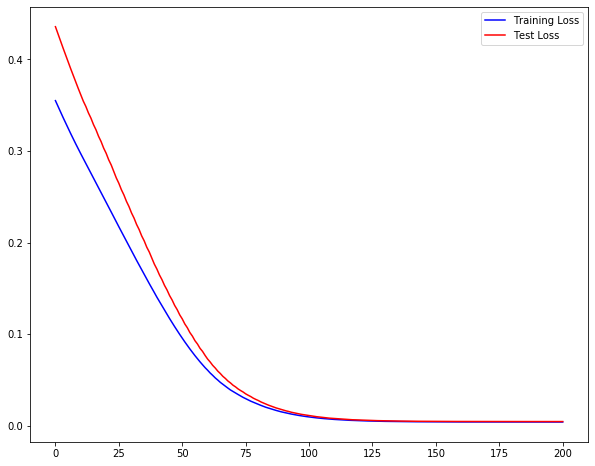

In [13]:
preds_train = model.prediction_history(X_train)
loss_train = model.loss_history(X_train, y_train)
preds_test = model.prediction_history(X_test)
loss_test = model.loss_history(X_test, y_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(loss_train, color="blue", label="Training Loss")
ax.plot(loss_test, color="red", label="Test Loss")
ax.legend();

In [14]:
model.get_coefficient_order()

[0, 9, 4]

### Test 4: Same as Test 3 but with the 95% Quantile

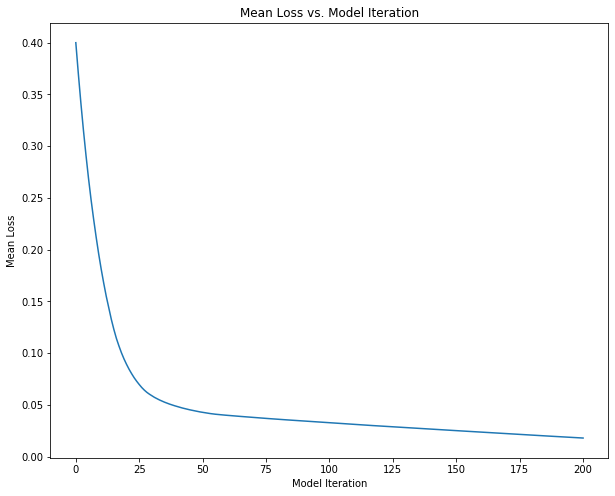

In [15]:
model = ForwardStagewiseGLM(link=IdentityLink(),
                            loss=QuantileLoss(p=0.95),
                            alpha=0.1)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

,0,1,2,3,4,5,6,7,8,9
199,0.711223,0.0,0.0,0.0,0.069639,0.0,0.0,0.0,0.0,0.498618


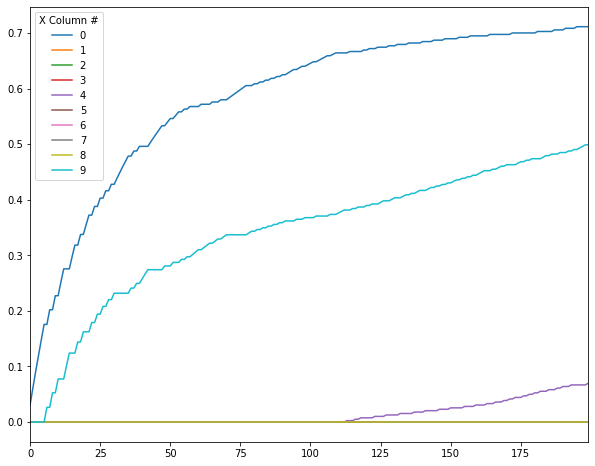

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history())
coef_history.plot(ax=ax)
ax.legend(title="X Column #")
coef_history.tail(1)

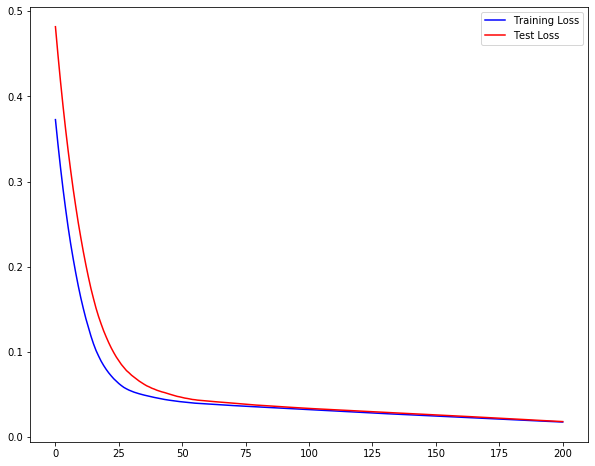

In [17]:
preds_train = model.prediction_history(X_train)
loss_train = model.loss_history(X_train, y_train)
preds_test = model.prediction_history(X_test)
loss_test = model.loss_history(X_test, y_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(loss_train, color="blue", label="Training Loss")
ax.plot(loss_test, color="red", label="Test Loss")
ax.legend();

In [18]:
model.get_coefficient_order()

[0, 9, 4]

### Re-do Test 1 but with LogCoshLoss, more predictors, and more noise

In [19]:
X, y, coef = make_regression(n_samples=10000,
                             n_features=900,
                             n_informative=25,
                             noise=15.0,
                             coef=True,
                             random_state=0)
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
%%time
model = ForwardStagewiseGLM(link=IdentityLink(),
                            loss=LogCoshLoss(),
                            alpha=1.0,
                            weights="newton")
model.fit(X, y, iterations=100)

CPU times: user 1min 47s, sys: 27.1 s, total: 2min 14s
Wall time: 50.1 s


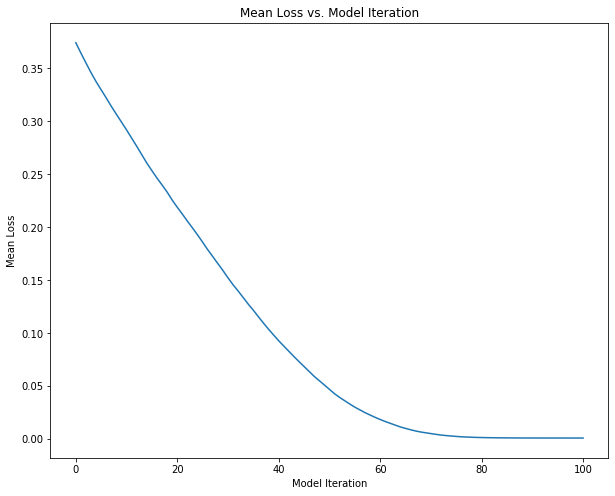

In [21]:
# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297493,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198978,0.0,0.001547


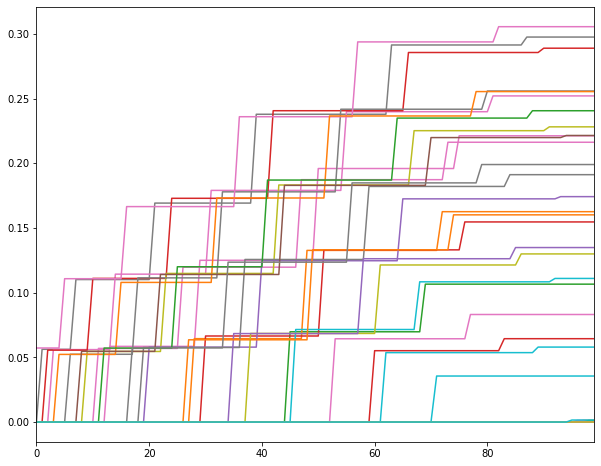

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history())
coef_history.plot(ax=ax)
ax.get_legend().remove()
coef_history.tail(1)

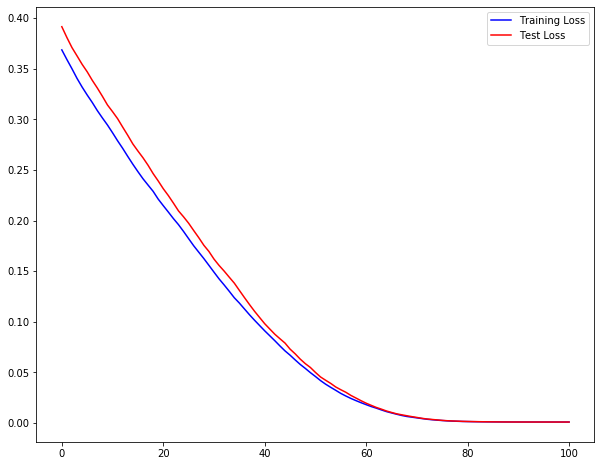

In [23]:
preds_train = model.prediction_history(X_train)
loss_train = model.loss_history(X_train, y_train)
preds_test = model.prediction_history(X_test)
loss_test = model.loss_history(X_test, y_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(loss_train, color="blue", label="Training Loss")
ax.plot(loss_test, color="red", label="Test Loss")
ax.legend();

In [24]:
print("Informative Indices:")
np.argwhere(coef > 0).ravel()

Informative Indices:


array([  7,  16,  36,  56,  96, 113, 118, 212, 297, 301, 303, 364, 396,
       409, 429, 489, 547, 558, 624, 661, 672, 765, 833, 871, 897])

In [25]:
print("Non-zero Model Coefficients:")
np.array(sorted(model.get_coefficient_order()))

Non-zero Model Coefficients:


array([  7,  16,  36,  56,  96, 113, 118, 212, 297, 301, 303, 348, 364,
       394, 396, 409, 429, 489, 547, 558, 624, 646, 661, 672, 765, 833,
       871, 872, 897, 899])